In [8]:
import scholarly, re, nltk, pickle
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import word_tokenize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
stopwords = set(STOPWORDS)
stopwords.update(["two", "found", "show", "may", "response", "effect"])

brain_mask = np.array(Image.open("imgs/brain_bw2.png"))
transformed_brain_mask = (brain_mask[...,0] == 255).astype(int) * 255

In [42]:
with open('data/all_abstracts_and_titles.pkl', 'rb') as f:
    all_abstracts_and_titles = pickle.load(f)
abstracts = [aat['abstracts'] for aat in all_abstracts_and_titles]
# function to flatten
flatten = lambda l: [item for sublist in l for item in sublist]
fabstracts = flatten(abstracts)

In [43]:
fabs_onestring = ' '.join(fabstracts)

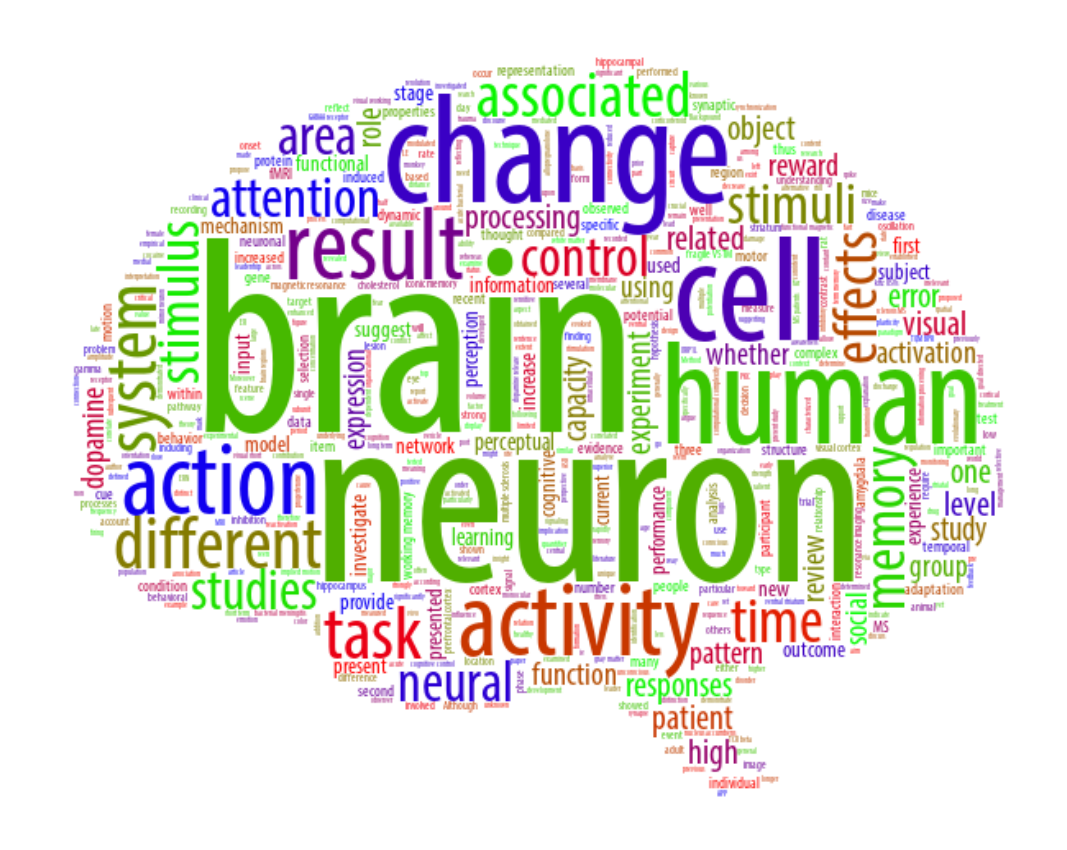

In [44]:
wc = WordCloud(font_path='data/MyriadPro-Cond.otf', 
               background_color="white", 
               width=2400, 
               height=1200, 
               max_words=1000, 
               mask=transformed_brain_mask,
               stopwords=stopwords, 
               relative_scaling=0.8, 
               colormap='brg').generate(fabs_onestring)
f = plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('imgs/wordcloud.pdf')